Saving annual_json.json to annual_json.json
Saving co2-annmean-mlo_json.json to co2-annmean-mlo_json.json


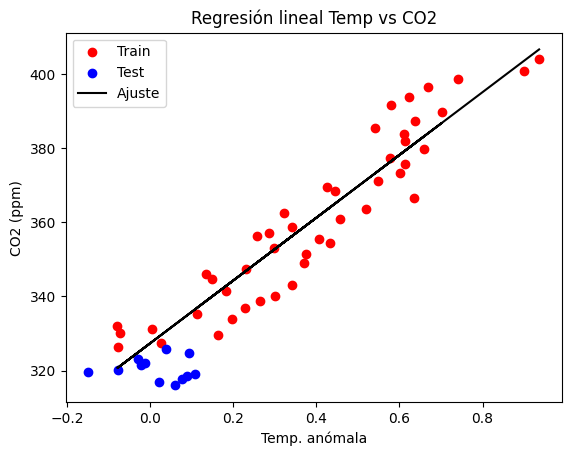

Ecuación: y = 327.39 + 84.78·X
MSE entreno: 61.99 | MSE test: 121.71
R² entreno: 0.88 | R² test: -13.23
Predicción para temp = 0.8: 395.21


In [8]:

from google.colab import files
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 1. Subir archivos desde el ordenador
uploaded = files.upload()

# 2. Leer los archivos
with open('annual_json.json', 'r') as f:
    temp_data = json.load(f)

with open('co2-annmean-mlo_json.json', 'r') as f:
    co2_data = json.load(f)

# 3. Filtrado de datos de temperatura (solo fuente GCAG)
temp_gcag = [entry for entry in temp_data if entry['Source'] == 'GCAG']
years_temp = [int(entry['Year']) for entry in temp_gcag]
temps = [entry['Mean'] for entry in temp_gcag]

# 4. Filtrado de datos de CO2 (todos los años disponibles)
years_co2 = [int(entry['Year'].split('-')[0]) for entry in co2_data]
co2s = [entry['Mean'] for entry in co2_data]

# 5. Unir por año
df_temp = pd.DataFrame({'Year': years_temp, 'Temp': temps})
df_co2 = pd.DataFrame({'Year': years_co2, 'CO2': co2s})
df = pd.merge(df_temp, df_co2, on='Year')

# 6. Preparamos X (Temp) e y (CO2)
X = df[['Temp']].values
y = df['CO2'].values

# 7. División en entrenamiento y test (80/20)
split = int(0.8 * len(df))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# 8. Modelo y entrenamiento
regr = LinearRegression()
regr.fit(X_train, y_train)

# 9. Predicciones y métricas
y_pred = regr.predict(X_train)
y_pred_test = regr.predict(X_test)
mse_train = mean_squared_error(y_train, y_pred)
mse_test = mean_squared_error(y_test, y_pred_test)
r2_train = r2_score(y_train, y_pred)
r2_test = r2_score(y_test, y_pred_test)

# 10. Gráfica
plt.scatter(X_train, y_train, color="red", label="Train")
plt.scatter(X_test, y_test, color="blue", label="Test")
plt.plot(X_train, y_pred, color="black", label="Ajuste")
plt.xlabel("Temp. anómala")
plt.ylabel("CO2 (ppm)")
plt.title("Regresión lineal Temp vs CO2")
plt.legend()
plt.show()

# 11. Parámetros y ejemplo de predicción diferente
pendiente = regr.coef_[0]
intercepto = regr.intercept_
nuevo_valor = np.array([[0.8]])
prediccion_nueva = regr.predict(nuevo_valor)

print(f'Ecuación: y = {intercepto:.2f} + {pendiente:.2f}·X')
print(f'MSE entreno: {mse_train:.2f} | MSE test: {mse_test:.2f}')
print(f'R² entreno: {r2_train:.2f} | R² test: {r2_test:.2f}')
print(f'Predicción para temp = 0.8: {prediccion_nueva[0]:.2f}')


